In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Считать файл в pandas DataFrame

In [252]:
df = pd.read_csv("train.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3. Ознакомиться с основными параметрами датасета, используя функции библиотеки pandas, включая следующие данные:

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### a) Количество точек данных (измерений) в наборе


In [254]:
df.shape[0]

891

In [255]:
len(df.shape)

2

### б) Количество полей данных (атрибутов)

In [256]:
df.shape[1]

12

### c) Тип данных каждого поля, шкала каждого поля

In [257]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### d) Количество отсутствующих значений для каждого поля

In [258]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### е) вывести количество уникальных значений, вывести уникальные значения только если их меньше 15 штук


In [259]:
df.apply(lambda x: len(x.unique()) == 1 or len(x.unique()) == len(x))


PassengerId     True
Survived       False
Pclass         False
Name            True
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [260]:
def lowest_15(ser):
    uniq = ser.unique()
    return uniq, len(uniq) if len(uniq) < 15 else pd.NA

In [261]:
df.apply(lowest_15).rename(index={0: "Values", 1: "Count"})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Values,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1]","[3, 1, 2]","[Braund, Mr. Owen Harris, Cumings, Mrs. John B...","[male, female]","[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...","[1, 0, 3, 4, 2, 5, 8]","[0, 1, 2, 5, 3, 4, 6]","[A/5 21171, PC 17599, STON/O2. 3101282, 113803...","[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....","[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...","[S, C, Q, nan]"
Count,<NA>,2,3,<NA>,2,<NA>,7,7,<NA>,<NA>,<NA>,4


### 4. Удалить из набора поля, не несущие информативной нагрузки - содержащие уникальные либо константные значения


In [262]:
df_dropped = df.drop(["PassengerId", "Name"], axis=1)
df_dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


### 5. Заменить возраст пассажиров на год рождения

In [277]:
df2 = df.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [278]:
df2["Age"] = (1912-df["Age"]).fillna(df["Age"].mean()
                                     ).astype(int)
df2



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1890,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1874,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1886,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1877,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,1877,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1885,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1893,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1886,0,0,111369,30.0000,C148,C


### 6. Переименовать все названия колонок на русском языке


In [279]:
df2 = df2.rename(columns={"PassengerId": "ПассажирИд",
                          "Survived": "Выжил", "Pclass": "Пкласс", "Name": "Имя", "Sex": "Пол", "Age": "Возраст",
                          "SibSp": "СибСп", "Parch": "Парч", "Ticket": "Билет", "Fare": "Тариф", "Cabin": "Порт", "Embarked": "Груз"})
df2


,ПассажирИд,Выжил,Пкласс,Имя,Пол,Возраст,СибСп,Парч,Билет,Тариф,Порт,Груз
0,1,0,3,"Braund, Mr. Owen Harris",male,1890,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1874,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1886,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1877,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,1877,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1885,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1893,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1886,0,0,111369,30.0000,C148,C


### 7. Заменить все отсутствующие данные средним значением (в случае числового поля) либо самым распространенным в категориальных полях.


In [280]:
df3 = df2.copy()

In [281]:
df3.isna().sum()

ПассажирИд      0
Выжил           0
Пкласс          0
Имя             0
Пол             0
Возраст         0
СибСп           0
Парч            0
Билет           0
Тариф           0
Порт          687
Груз            2
dtype: int64

In [282]:
df3["Порт"] = df3["Порт"].fillna(df3["Порт"].mode().iloc[0])
df3["Груз"] = df3["Груз"].fillna(df3["Груз"].mode().iloc[0])
df3.isna().sum()

ПассажирИд    0
Выжил         0
Пкласс        0
Имя           0
Пол           0
Возраст       0
СибСп         0
Парч          0
Билет         0
Тариф         0
Порт          0
Груз          0
dtype: int64

### 8. Сохранить получившийся набор данных в формате CSV


In [283]:
df3.to_csv("task8.csv")

### 8. Вывести гистограмму распределения выживших по возрасту

In [270]:
df3["Возраст"] = df["Age"]
survived = df3[df3["Выжил"] == 1]

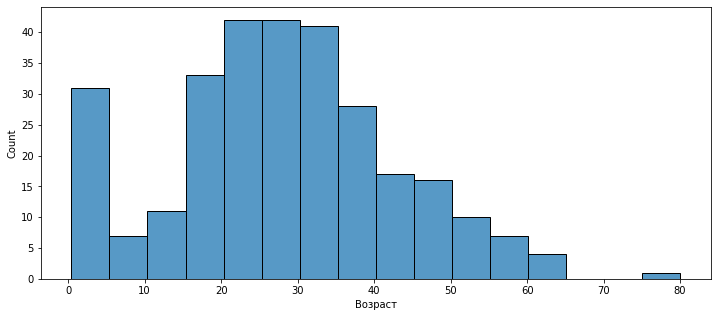

In [271]:
sns.histplot(x=survived["Возраст"]);

### 9.Вывести гистограмму распределения выживших по возрасту и классу

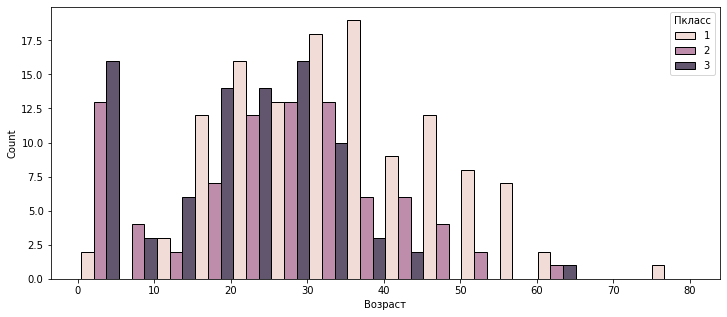

In [272]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.histplot(x=survived["Возраст"], hue=survived["Пкласс"], multiple="dodge");

### 10. Гистограмма распределения выживших по полу

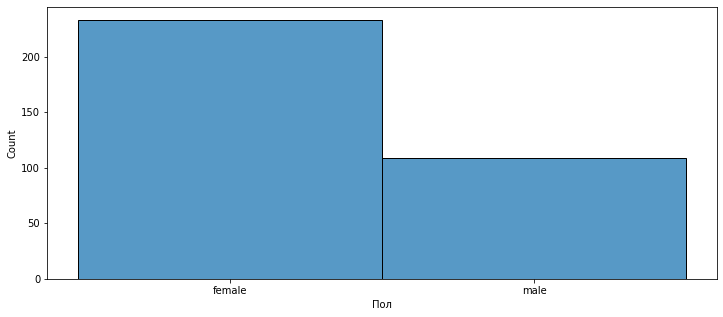

In [273]:
sns.histplot(x=survived["Пол"]);

### 11. Вывести титулы в отдельную колонку, убрать самые редкие

In [295]:
df3["Титул"] = df3["Имя"].str.split(", ").str[0]
df3["Имя"] = df3["Имя"].str.split(", ").str[1]
df3

,ПассажирИд,Выжил,Пкласс,Имя,Пол,Возраст,СибСп,Парч,Билет,Тариф,Порт,Груз,Титул
0,1,0,3,Mr. Owen Harris,male,1890,1,0,A/5 21171,7.2500,B96 B98,S,Braund
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,1874,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,Miss. Laina,female,1886,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Heikkinen
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,1877,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,Mr. William Henry,male,1877,0,0,373450,8.0500,B96 B98,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev. Juozas,male,1885,0,0,211536,13.0000,B96 B98,S,Montvila
887,888,1,1,Miss. Margaret Edith,female,1893,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,B96 B98,S,Johnston
889,890,1,1,Mr. Karl Howell,male,1886,0,0,111369,30.0000,C148,C,Behr


In [396]:
d = {k: v for k, v in (df3["Титул"].value_counts() > 2).to_dict().items() if v == 1}
len(d)

50

In [397]:
def filter_t11(item):
    if item["Титул"] in d:
        return item
    else:
        item["Титул"] = pd.NA
    return item


In [398]:
df4 = df3.apply(filter_t11, axis=1).dropna(subset=["Титул"])
df4

,ПассажирИд,Выжил,Пкласс,Имя,Пол,Возраст,СибСп,Парч,Билет,Тариф,Порт,Груз,Титул
5,6,0,3,Mr. James,male,29,0,0,330877,8.4583,B96 B98,Q,Moran
7,8,0,3,Master. Gosta Leonard,male,1910,3,1,349909,21.0750,B96 B98,S,Palsson
8,9,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,1885,0,2,347742,11.1333,B96 B98,S,Johnson
13,14,0,3,Mr. Anders Johan,male,1873,1,5,347082,31.2750,B96 B98,S,Andersson
16,17,0,3,Master. Eugene,male,1910,4,1,382652,29.1250,B96 B98,Q,Rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Miss. Dorothy Edith ""Dolly""",female,29,8,2,CA. 2343,69.5500,B96 B98,S,Sage
869,870,1,3,Master. Harold Theodor,male,1908,1,1,347742,11.1333,B96 B98,S,Johnson
876,877,0,3,Mr. Alfred Ossian,male,1892,0,0,7534,9.8458,B96 B98,S,Gustafsson
885,886,0,3,Mrs. William (Margaret Norton),female,1873,0,5,382652,29.1250,B96 B98,Q,Rice
